In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
pd.set_option('display.max_columns', None)

In [175]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [176]:
df.sample(3)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
848,house,independent,sector 8,0.82,10224.0,802.0,Carpet area: 802 (74.51 sq.m.),4,4,0,2.0,NaN,Undefined,NaN,NaN,802.0,0,0,0,0,0,0,0
1145,flat,zara aavaas,sector 104,0.40,7029.0,569.0,Super Built up area 569(52.86 sq.m.),2,2,1,14.0,NaN,Relatively New,569.0,NaN,NaN,0,0,0,0,0,0,38
2737,flat,paras dews,sector 106,1.13,6406.0,1764.0,Super Built up area 1760(163.51 sq.m.)Built Up...,3,4,3+,18.0,North-West,Relatively New,1760.0,1186.0,1130.0,1,1,0,0,0,0,49


In [177]:
df.shape

(3677, 23)

In [178]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

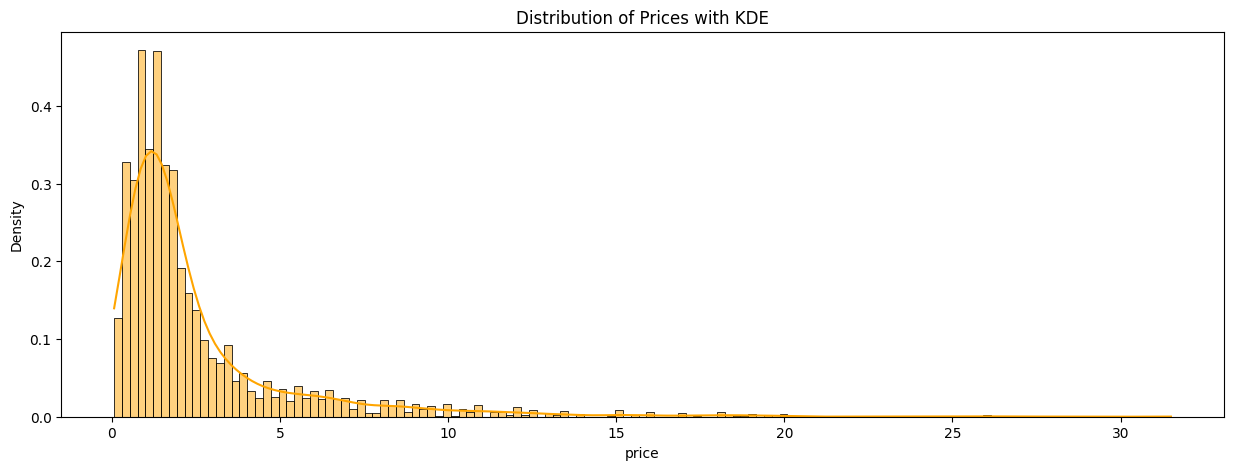

In [179]:
plt.figure(figsize=(15,5))
sns.histplot(x='price',data=df,kde=True,color='orange',stat='density')
plt.title('Distribution of Prices with KDE')
plt.show()

<Axes: xlabel='price'>

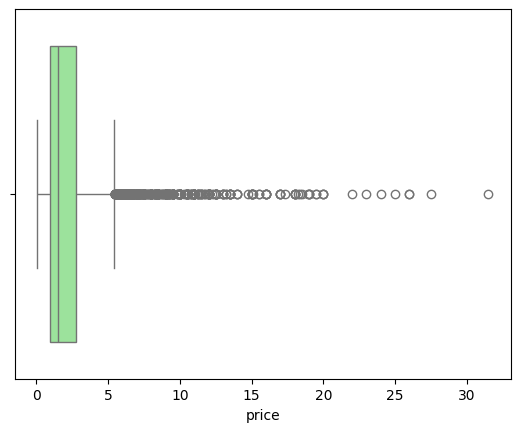

In [180]:
sns.boxplot(x='price',data=df,color='lightgreen')

In [181]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [182]:
outliers.sort_values('price',ascending=False).head(10)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
821,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.5,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,2,74
2834,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42
2488,house,dlf city plots,sector 26,26.0,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,1,138
2211,house,independent,sector 26,26.0,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72
1686,house,suncity township,sector 54,25.0,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,0,0
3046,house,emaar the palm springs,sector 54,24.0,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,122
2765,house,independent,sector 26,23.0,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,1,145
2667,house,vipul tatvam villa,sector 48,22.0,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,0,54
874,house,dlf city plots,sector 26,20.0,44265.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,1,153
2096,house,luxury dlf city floors,sector 26,20.0,48889.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,1,31


- on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

### Price_per_sqft

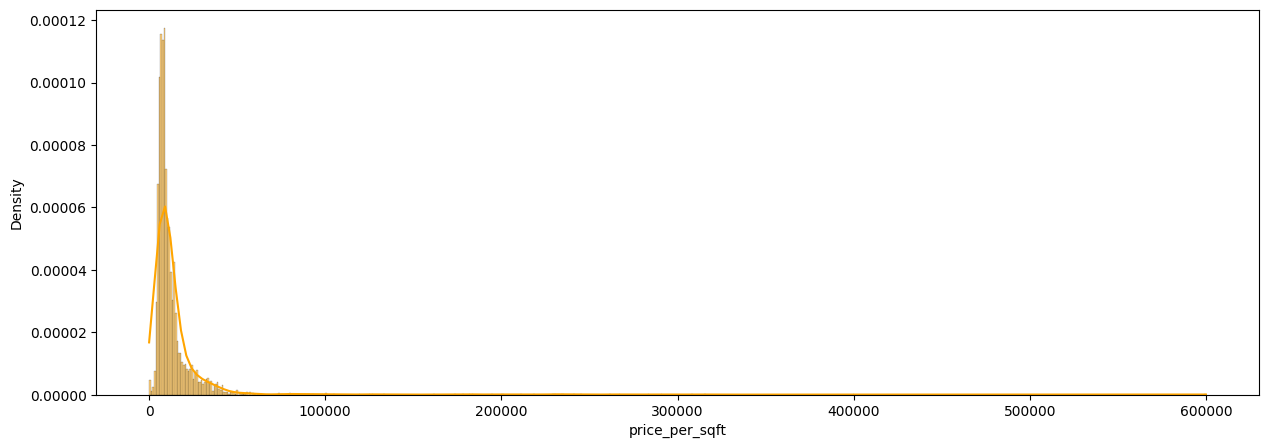

In [183]:
plt.figure(figsize=(15,5))
sns.histplot(x='price_per_sqft',data=df,stat='density',kde=True,color='orange')
plt.show()

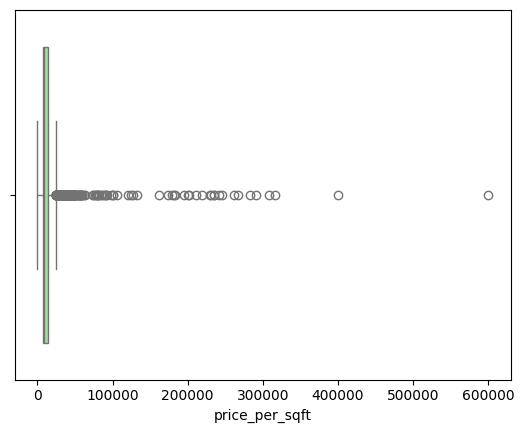

In [184]:
sns.boxplot(x='price_per_sqft',data=df,color='lightgreen')
plt.show()

In [185]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [186]:
outliers_sqft.loc[outliers_sqft['area'] < 1000, 'area'] = outliers_sqft.loc[outliers_sqft['area'] < 1000, 'area'].apply(lambda x: x * 9)

In [187]:
outliers_sqft.loc[:, 'price_per_sqft'] = round((outliers_sqft['price'] * 10000000) / outliers_sqft['area'])

In [188]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [189]:
df.update(outliers_sqft)

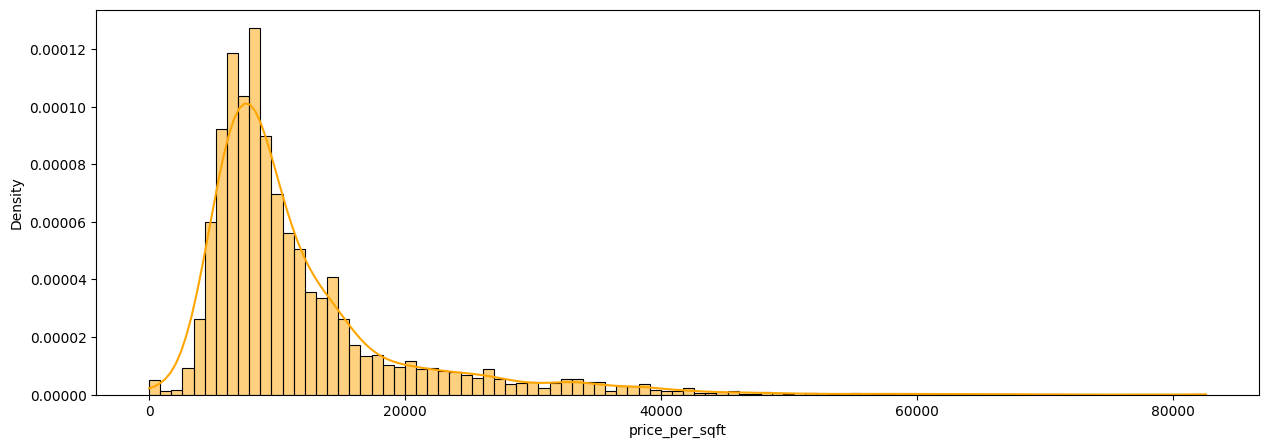

In [190]:
plt.figure(figsize=(15,5))
sns.histplot(x='price_per_sqft', data=df, kde=True, stat='density',color='orange')
plt.show()

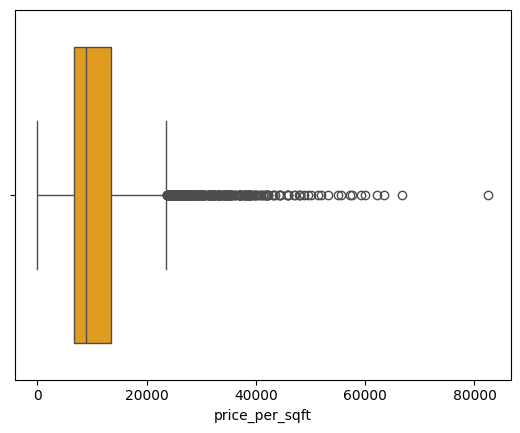

In [191]:
sns.boxplot(x='price_per_sqft', data=df, color='orange')
plt.show()

- Taking properties below 50000 to remove some outliers

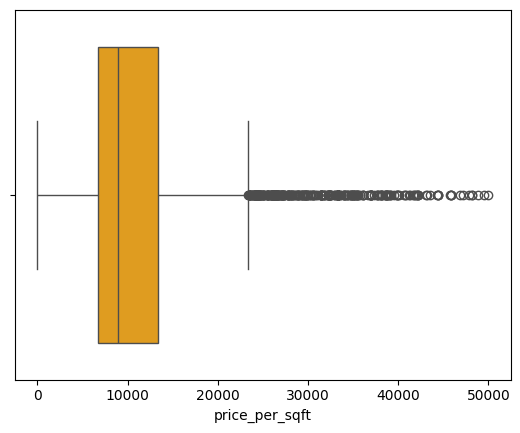

In [192]:
df = df[df['price_per_sqft'] <= 50000]
sns.boxplot(x='price_per_sqft', data=df, color='orange')
plt.show()

### Area

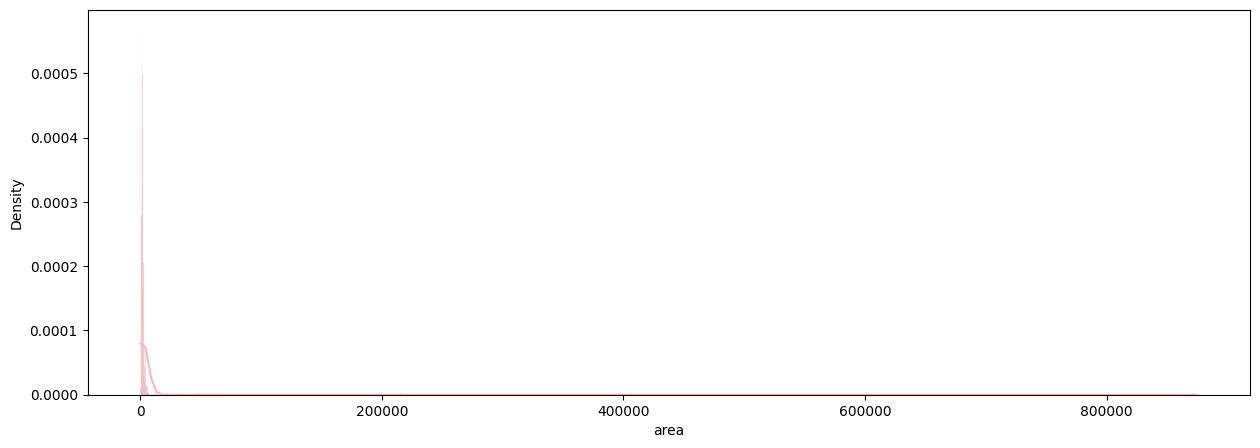

In [193]:
plt.figure(figsize=(15,5))
sns.histplot(x='area', data=df, kde=True, stat='density',color='lightpink')
plt.show()

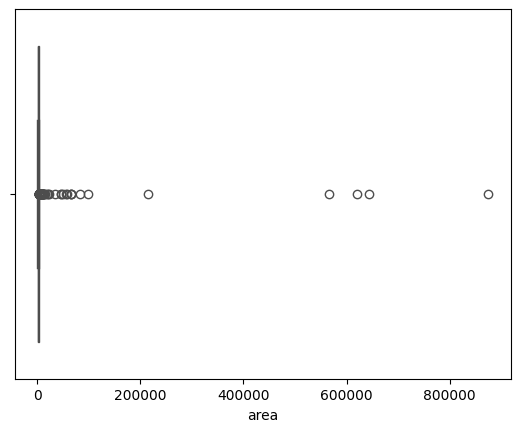

In [194]:
sns.boxplot(x='area', data=df, color='orange')
plt.show()

In [195]:
df['area'].describe()

count      3647.000000
mean       2947.723608
std       23208.194102
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

- Taking area below 100000 to remmove outliers

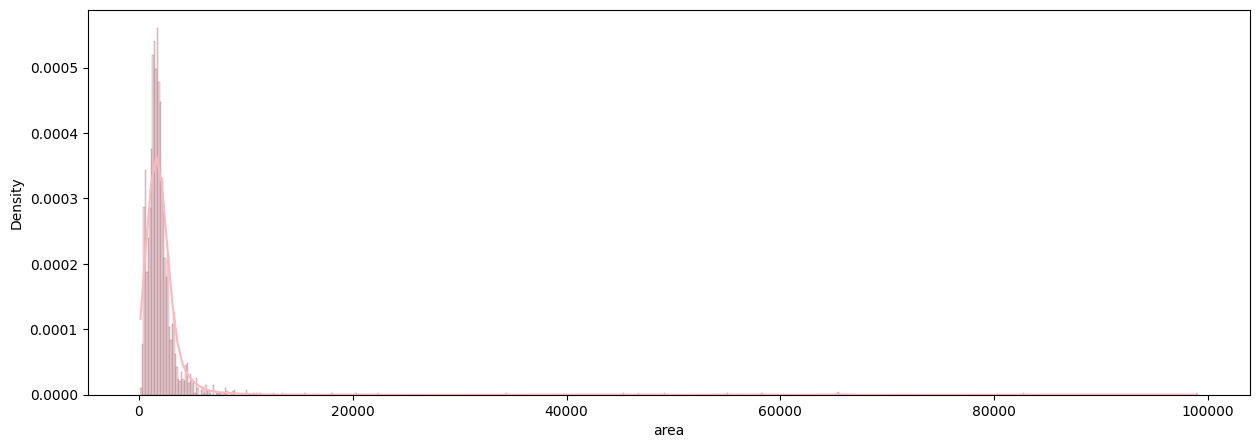

In [196]:
df = df[df['area'] < 100000]
plt.figure(figsize=(15,5))
sns.histplot(x='area', data=df, kde=True, stat='density',color='lightpink')
plt.show()

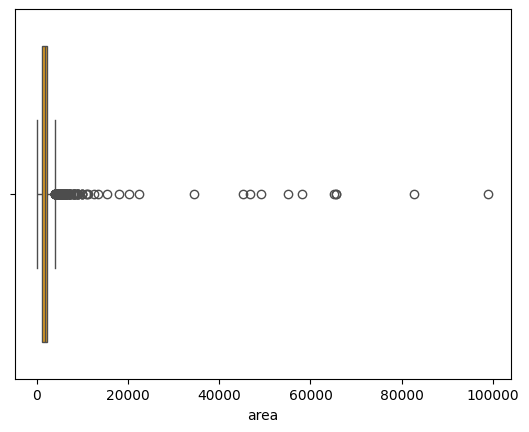

In [197]:
sns.boxplot(x='area', data=df, color='orange')
plt.show()

In [198]:
df[df['area'] > 10000].sort_values('area',ascending=False)


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
818,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,1,60
48,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
1123,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,0,51
1796,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,0,15
300,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,0,15
2356,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,0,37
115,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,0,37
2666,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
3649,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,0,33


In [199]:
# Removing these indexes because there is mismatch between area and rooms count and with other columns, making it incorrect data
df.drop(index=[818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471], inplace=True)

In [200]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
48,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
300,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
2666,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
1358,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9,9,3+,3.0,North-East,New Property,NaN,2660.0,2500.00,0,1,0,0,0,1,61
3195,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8,7,3+,3.0,East,Moderately Old,NaN,2850.0,2250.00,1,1,0,1,1,1,123
2131,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.00,1,0,0,1,1,1,44
3088,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3,3,1,2.0,North-East,Moderately Old,NaN,2160.0,1720.00,0,1,0,0,0,0,160
3444,flat,godrej icon,sector 88a,1.75,1384.0,12645.0,Carpet area: 1175.11,3,3,3+,6.0,NaN,New Property,NaN,NaN,1175.11,0,0,0,0,0,0,55
2834,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42
2342,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.00,0,1,0,0,0,0,60


In [201]:
# Manually assigning carpet area as area for the rows

df.loc[48,'area'] = 115*9
df.loc[300,'area'] = 7250
df.loc[2666,'area'] = 5800
df.loc[1358,'area'] = 2660
df.loc[3195,'area'] = 2850
df.loc[2131,'area'] = 1812
df.loc[3088,'area'] = 2160
df.loc[3444,'area'] = 1175

- Checking distribution again after removing outliers

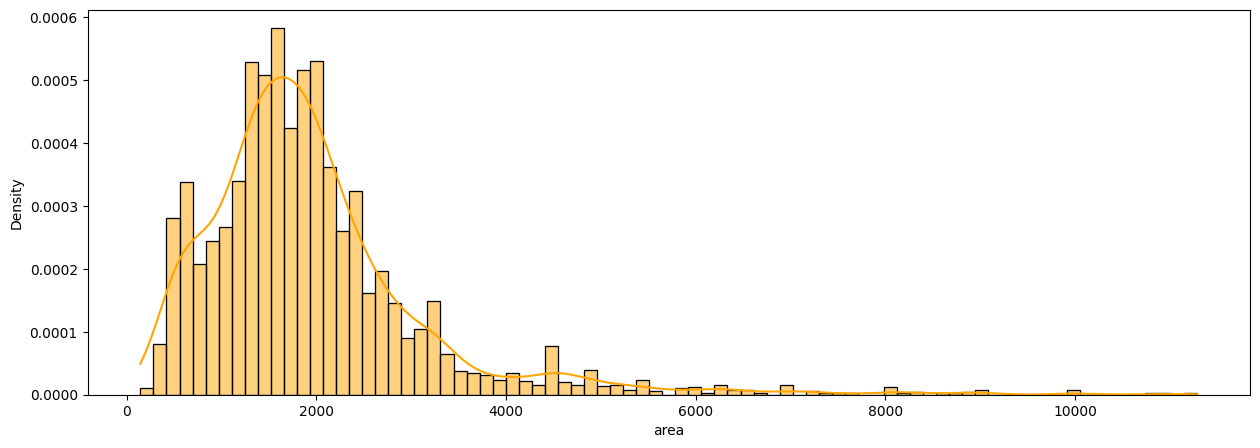

In [202]:
plt.figure(figsize=(15,5))
sns.histplot(x='area', data=df, kde=True, stat='density',color='orange')
plt.show()

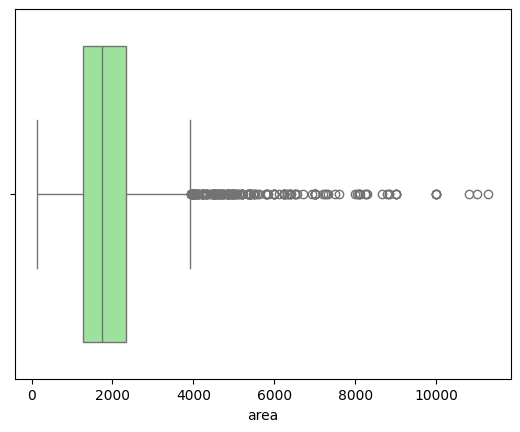

In [203]:
sns.boxplot(x='area', data=df, color='lightgreen')
plt.show()

In [204]:
df['area'].describe()

count     3633.000000
mean      1950.357005
std       1215.707897
min        145.000000
25%       1260.000000
50%       1747.000000
75%       2325.000000
max      11286.000000
Name: area, dtype: float64

### Bedroom

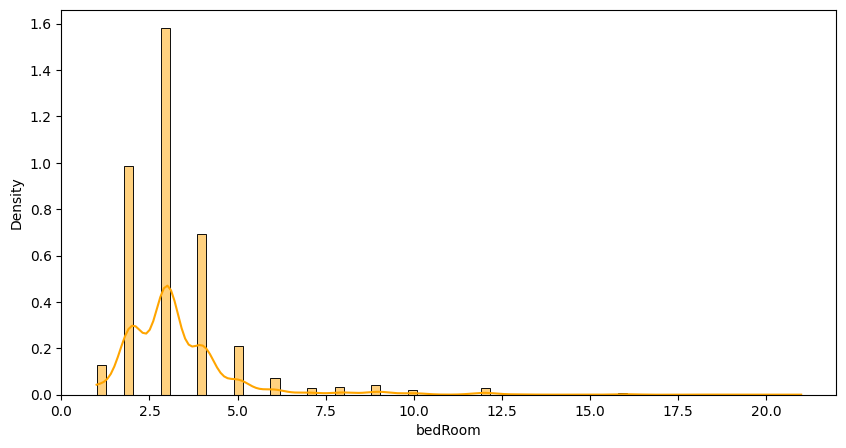

In [205]:
plt.figure(figsize=(10,5))
sns.histplot(x='bedRoom', data=df, kde=True, stat='density',color='orange')
plt.show()

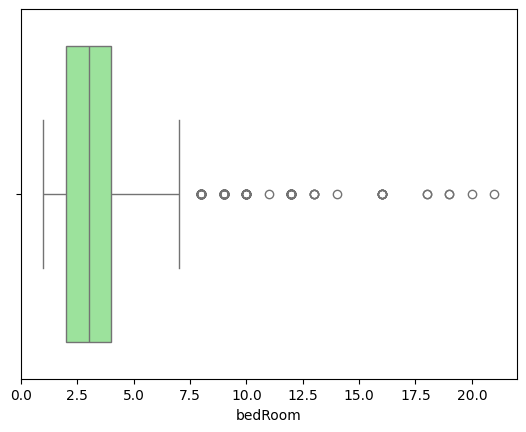

In [206]:
sns.boxplot(x='bedRoom', data=df, color='lightgreen')
plt.show()

In [207]:
df['bedRoom'].describe()

count    3633.000000
mean        3.333609
std         1.830035
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [208]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False).shape

(45, 23)

- Removing all properties that has more bedrooms then 10

In [209]:
df = df[df['bedRoom'] <= 10]

In [210]:
df.shape

(3588, 23)

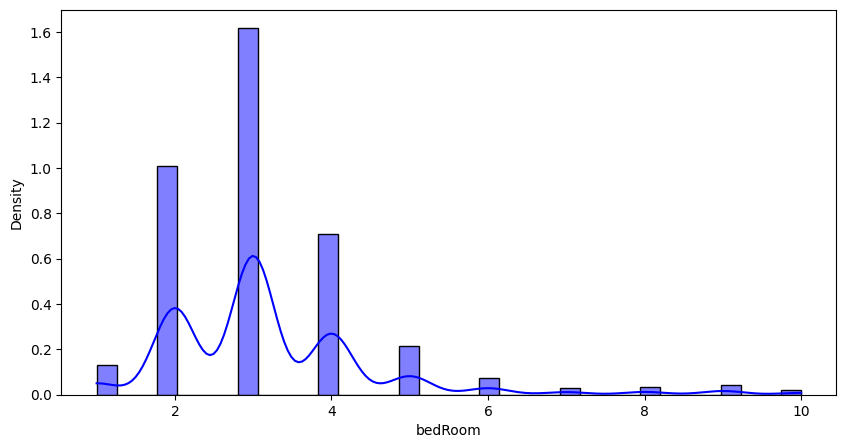

In [211]:
plt.figure(figsize=(10,5))
sns.histplot(x='bedRoom', data=df, kde=True, stat='density',color='blue')
plt.show()

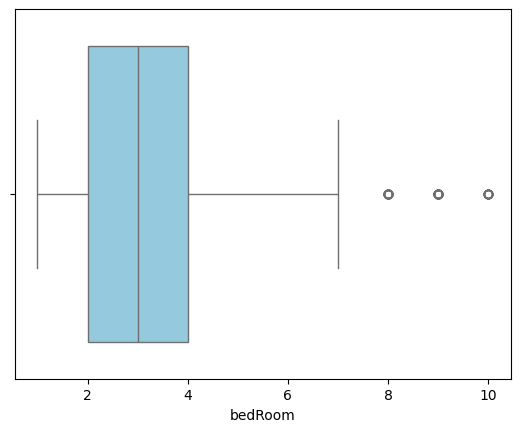

In [212]:
sns.boxplot(x='bedRoom', data=df, color='skyblue')
plt.show()

In [213]:
df['bedRoom'].describe()

count    3588.000000
mean        3.203735
std         1.393968
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

### Bathroom

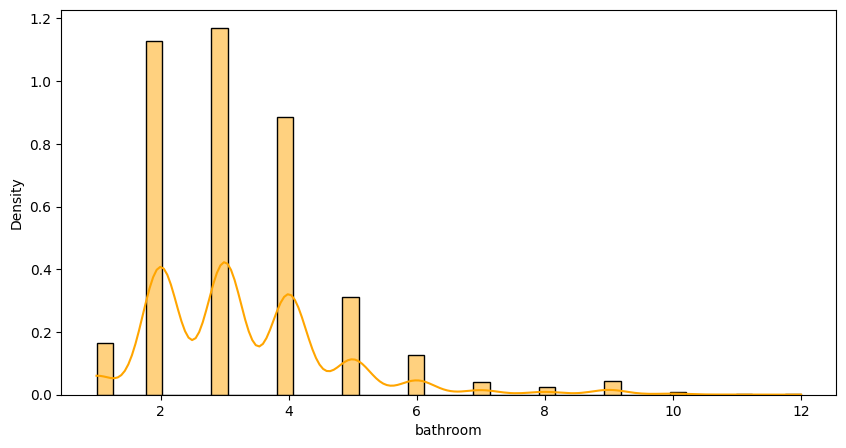

In [214]:
plt.figure(figsize=(10,5))
sns.histplot(x='bathroom', data=df, kde=True, stat='density',color='orange')
plt.show()

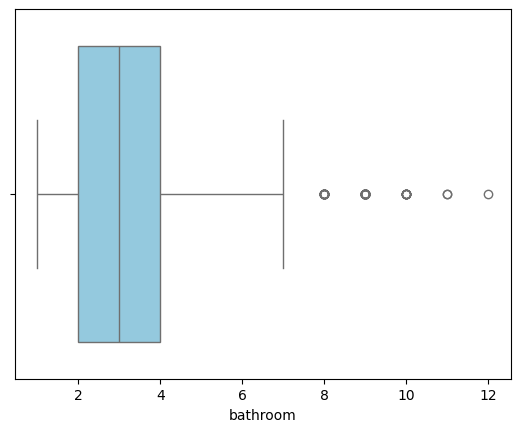

In [215]:
sns.boxplot(x='bathroom', data=df, color='skyblue')
plt.show()

In [216]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3267,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0,1,0,0,0,1,146
2771,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0,0,0,1,0,2,38
2816,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,3.0,East,Old Property,NaN,5000.0,NaN,1,1,0,1,1,1,39


### super built up area

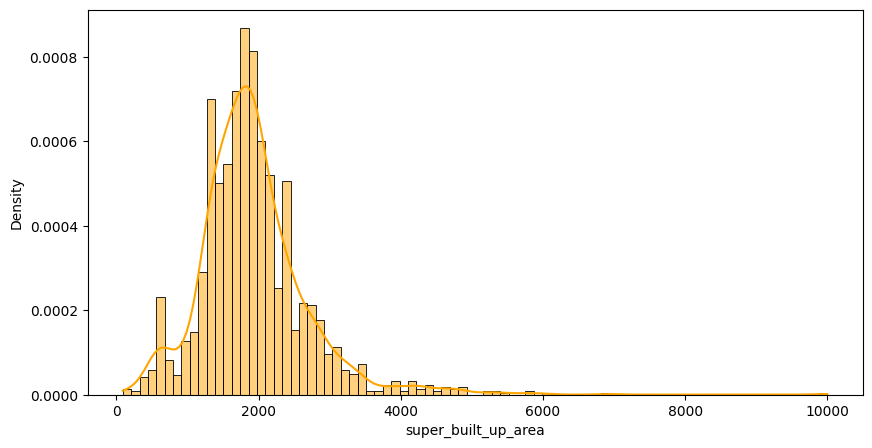

In [217]:
plt.figure(figsize=(10,5))
sns.histplot(x='super_built_up_area', data=df, kde=True, stat='density',color='orange')
plt.show()

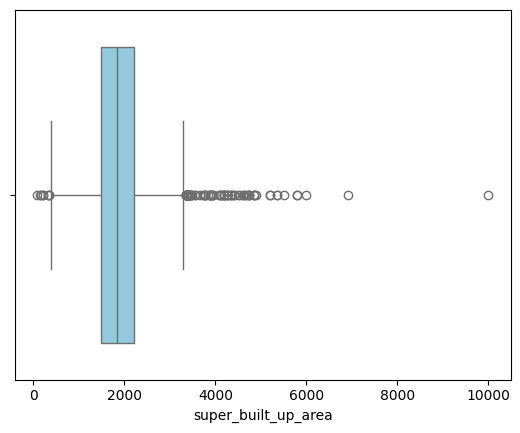

In [218]:
sns.boxplot(x='super_built_up_area', data=df, color='skyblue')
plt.show()

In [219]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [220]:
# checking outliers
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1323,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0,1,0,0,0,1,140
3265,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0,1,0,1,1,0,49


### built up area

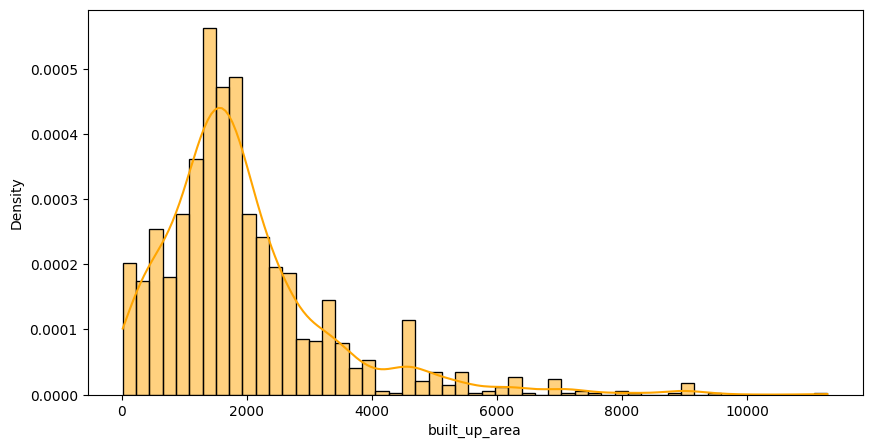

In [221]:
plt.figure(figsize=(10,5))
sns.histplot(x='built_up_area', data=df, kde=True, stat='density',color='orange')
plt.show()

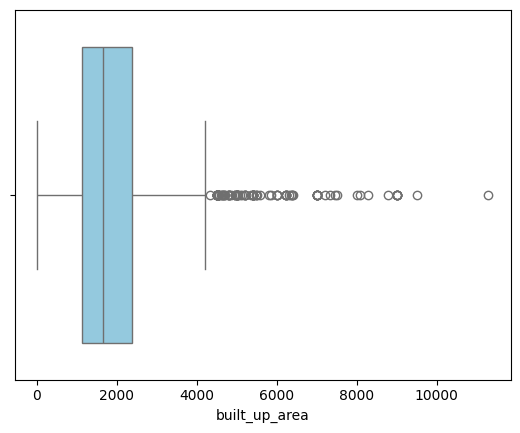

In [222]:
sns.boxplot(x='built_up_area', data=df, color='skyblue')
plt.show()

In [223]:
# checking outliers
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2834,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42


### carpet area

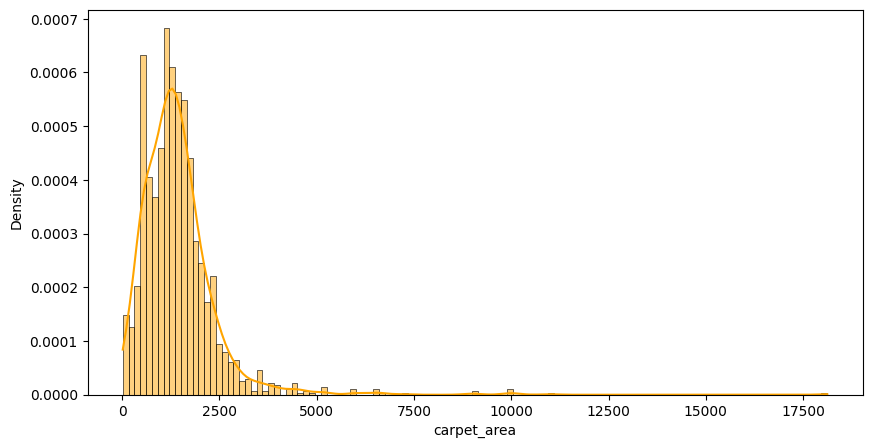

In [224]:
plt.figure(figsize=(10,5))
sns.histplot(x='carpet_area', data=df, kde=True, stat='density',color='orange')
plt.show()

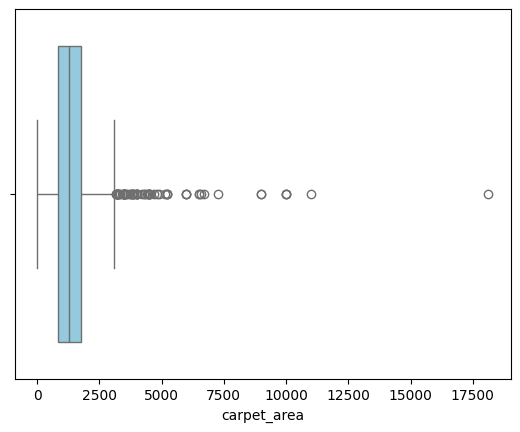

In [225]:
sns.boxplot(x='carpet_area', data=df, color='skyblue')
plt.show()

In [226]:
# checking outliers

df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2131,flat,godrej air,sector 85,2.5,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,1,0,0,1,1,1,44
2342,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60


In [227]:
# Changing the value of carpet area with area, looks like there is some mistake in data
df.loc[2131,'carpet_area'] = 1812

In [228]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2342,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60


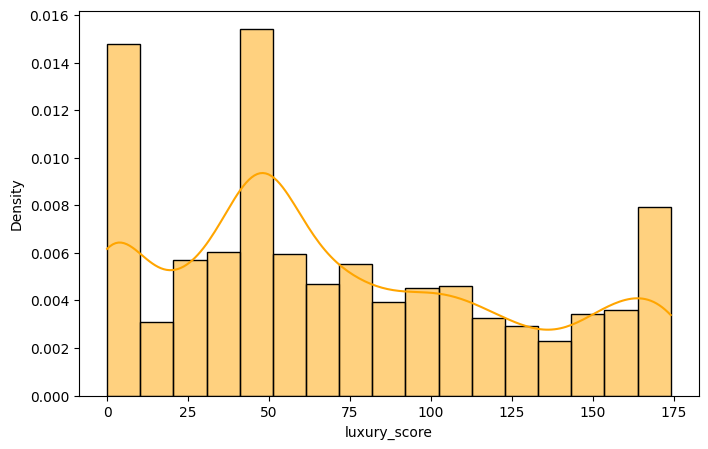

In [229]:
plt.figure(figsize=(8,5))
sns.histplot(x='luxury_score', data=df, kde=True, stat='density',color='orange')
plt.show()

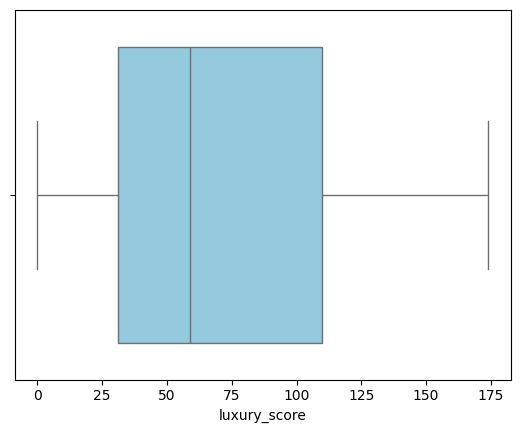

In [230]:
sns.boxplot(x='luxury_score', data=df, color='skyblue')
plt.show()

In [231]:
df.shape

(3588, 23)

In [232]:
# Recalculating the price_per_sqft column after applying above changes
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

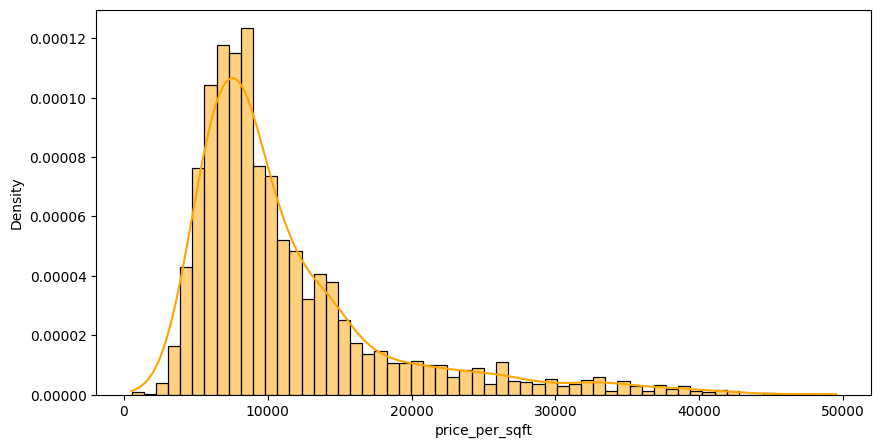

In [233]:
plt.figure(figsize=(10,5))
sns.histplot(x='price_per_sqft', data=df, kde=True, stat='density',color='orange')
plt.show()